# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [5]:
type(df)


pandas.core.frame.DataFrame

In [6]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [7]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [8]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [9]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [10]:
# Mean of all salaries
df["salary"].mean()


113706.45843828715

In [11]:
# Median of all salaries
df['salary'].median()

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [12]:
df[['sex','salary']]

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500
...,...,...
392,Male,103106
393,Male,150564
394,Male,101738
395,Male,95329


Finding the Median salary for all males

In [13]:
df.query("sex=='Male'")['salary'].median()

108043.0

Finding the Median salary for all females

In [14]:
df.query("sex=='Female'")['salary'].median()

103750.0

Comparing the Mean salary of Males and Females

In [15]:
mean_male_salary = df.query("sex=='Male'")['salary'].mean()
print(mean_male_salary)

115090.41899441341


In [16]:
mean_female_salary = df.query("sex=='Female'")['salary'].mean()
print(mean_female_salary)

101002.41025641025


In [17]:
# The difference between mean salaries of male and female
difference_salaries = mean_male_salary - mean_female_salary
print(difference_salaries)

14088.008738003162


# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [18]:
df[['yrs.service']]
limit = 20
column_name = 'yrs.service'
column = df[column_name]
# Get count of values equal to 20 
count = column[column == limit].sum()
print(count)

200


Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [19]:
#df[['yrs.service']]
plus_20 = df[df['yrs.service']>=20]['salary'].mean()
print(plus_20)

122520.65605095541


In [20]:
less_than20 = df[df['yrs.service']<=20]['salary'].mean()
print(less_than20)

108768.776


In [21]:
difference = plus_20-less_than20
print(difference)


13751.880050955413


People who have salary of greater than or equal to 200,000

In [22]:

df["salary"] = pd.to_numeric(df["salary"])
print(df["salary"])
df[df['salary'] >= 200000]










0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64


,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
43,44,Prof,B,38,38,Male,231545
249,250,Prof,A,29,7,Male,204000
364,365,Prof,A,43,43,Male,205500


Your Findings here...


# Rename values, subset columns, etc

In [23]:
df.rename(columns = {"yrs.service": "Service(years)"}, 
          inplace = True)
df.head()


,Unnamed: 0,rank,discipline,yrs.since.phd,Service(years),sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [24]:
df["discipline"].replace({"B": "x", "C": "y"}, inplace=True)
print(df)

     Unnamed: 0      rank discipline  ...  Service(years)   sex  salary
0             1      Prof          x  ...              18  Male  139750
1             2      Prof          x  ...              16  Male  173200
2             3  AsstProf          x  ...               3  Male   79750
3             4      Prof          x  ...              39  Male  115000
4             5      Prof          x  ...              41  Male  141500
..          ...       ...        ...  ...             ...   ...     ...
392         393      Prof          A  ...              30  Male  103106
393         394      Prof          A  ...              19  Male  150564
394         395      Prof          A  ...              25  Male  101738
395         396      Prof          A  ...              15  Male   95329
396         397  AsstProf          A  ...               4  Male   81035

[397 rows x 7 columns]


# Create some simple visualizations showing some simple statistics

In [26]:
df[['sex','salary']]


,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500
...,...,...
392,Male,103106
393,Male,150564
394,Male,101738
395,Male,95329


Text(0.5, 1.0, 'Average service years of females versus males')

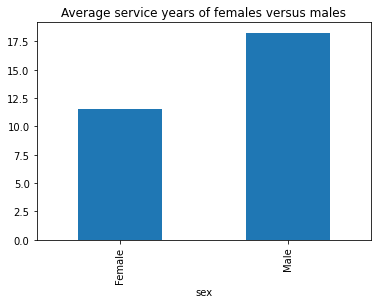

In [48]:

# average years of service for male and female workers in a bar graph display
df.groupby('sex')['Service(years)'].mean().plot(kind = 'bar')
plt.title('Average service years of females versus males')



Text(0.5, 1.0, 'Average salary of females versus males')

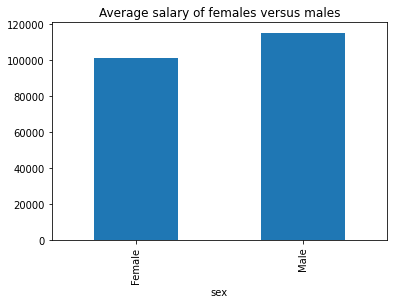

In [49]:
df.groupby('sex')['salary'].mean().plot(kind = 'bar')
plt.title('Average salary of females versus males')


Your observations from the visuals: 

# Draw some conclusions based on the data.  What did you discover?

As shown above, for the most part the more years of service there are the higher the salary.


There is a pattern that shows assistant professors earn a lower salary than professors by roughly $40k.

Females have a lower salary than males do and they also have a lower salary than males.

